In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%pylab inline
import seaborn as sns
sns.set(style=('whitegrid'))


Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Import data

In [35]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
display(df_train.head())
display(df_test.head())

display(df_train.isnull().any())
display(df_test.isnull().any())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


,id,comment_text
0,6044863,==Orphaned non-free media (Image:41cD1jboEvL. ...
1,6102620,::Kentuckiana is colloquial. Even though the ...
2,14563293,"Hello fellow Wikipedians,\nI have just modifie..."
3,21086297,"AKC Suspensions \nThe Morning Call - Feb 24, 2..."
4,22982444,== [WIKI_LINK: Talk:Celts] ==


id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

id              False
comment_text     True
dtype: bool

In [29]:
toxic = df_train[df_train["toxic"] == 1]
severe_toxic = df_train[df_train["severe_toxic"] == 1]
obscene = df_train[df_train["obscene"] == 1]
threat = df_train[df_train["threat"] == 1]
insult = df_train[df_train["insult"] == 1]
identity_hate = df_train[df_train["identity_hate"] == 1]

data = [toxic, severe_toxic, obscene, threat, insult, identity_hate]

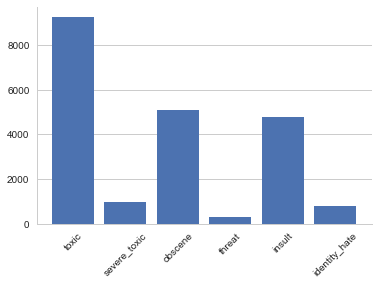

In [44]:
data_len = [len(i) for i in data]

plt.figure()
ax = plt.subplot()
plt.bar(range(len(data_len)), data_len, tick_label=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]);
plt.xticks(rotation=45);
plt.grid(axis='x')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [114]:
train_comment_len = [len(df_train["comment_text"].iloc[i]) for i in range(len(df_train))]
test_comment_len = [len(df_test["comment_text"].iloc[i]) for i in range(len(df_test))]

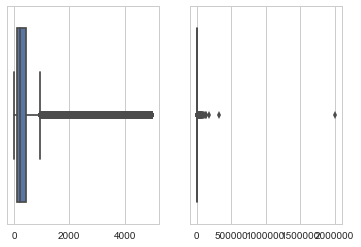

In [83]:
plt.figure()
plt.subplot(121)
sns.boxplot(train_comment_len)
plt.subplot(122)
sns.boxplot(test_comment_len)

# Some severe outlier in the test set comments regarding their length

In [105]:
for i in range(len(df_test)):
    if len(df_test["comment_text"].iloc[i]) > 50000:
        print(i)

2295
6615
11003
11890
13892
22952
27788
30455
41338
46573
90905
93098
93830
123603
159718
161662
162709
178401
182181
183523
198016
204163
211023
214835


In [112]:
test_comment_len = [i for i in test_comment_len if i < 7500]

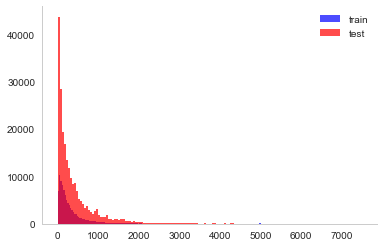

In [113]:
plt.figure()
ax = plt.subplot()
plt.hist(train_comment_len, bins=150, color="blue", alpha=0.7, label="train");
plt.hist(test_comment_len, bins=150, color="red", alpha=0.7, label="test");
plt.grid(False)
plt.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

<Container object of 2 artists>

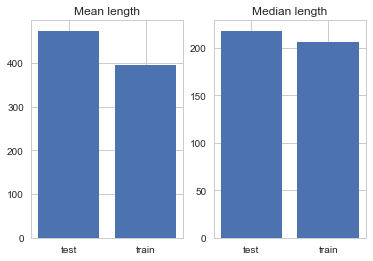

In [123]:
plt.figure()
plt.subplot(121)
plt.title("Mean length")
plt.bar(range(2), [np.mean(test_comment_len), np.mean(train_comment_len)], tick_label=["test", "train"])
plt.subplot(122)
plt.title("Median length")
plt.bar(range(2), [np.median(test_comment_len), np.median(train_comment_len)], tick_label=["test", "train"])

In [10]:
df_train = df_train.fillna("Na")
df_test = df_test.fillna("Na")

In [11]:
def text_preprocessing(text):
    from nltk.corpus import stopwords
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem import WordNetLemmatizer
    
    tokenizer = RegexpTokenizer(r'\w+')
    stop = set(stopwords.words('english')) 
    lemmatizer = WordNetLemmatizer()
     
    processed = []   
    print("Start preprocessing: ")
    for i in range(len(text)):
        if i == 10:
            print("yehaa we making progress")
        if i%10000 == 0:
            print("{} of {}".format(i, len(text)))
        temp = tokenizer.tokenize(text.iloc[i])
        temp = [lemmatizer.lemmatize(i) for i in temp if i not in stop]
        temp = (" ").join(temp)
        processed.append(temp)
        
    return processed

In [39]:
df_train["processed"] = text_preprocessing(df_train["comment_text"])
df_test["processed"] = text_preprocessing(df_test["comment_text"])

Start preprocessing: 
0 of 95851
yehaa we making progress
10000 of 95851
20000 of 95851
30000 of 95851
40000 of 95851
50000 of 95851
60000 of 95851
70000 of 95851
80000 of 95851
90000 of 95851


In [ ]:
# create submission file
submission_chains = pd.read_csv('../input/sample_submission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

from sklearn.model_selection import train_test_split
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df_train = df_train.fillna("unknown")
df_test = df_test.fillna("unknown")

comments_train, comments_valid, train_l, valid_l = train_test_split(df_train['processed'],df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
                                                          , test_size=0.2, random_state=1337)


comments_test = df_test["processed"]

'''
def text_process(comment):
    nopunc = [char for char in comment if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
'''
#Couldnt remove the stop words using the above function since it is taking too long
#Can try it on a local machine, I feel it improves the score-Not sure though


'''
transform_com = CountVectorizer().fit(pd.concat([train['comment_text'],test['comment_text']],axis=0))
comments_train = transform_com.transform(train['comment_text'])
comments_test = transform_com.transform(test['comment_text'])
gc.collect()'''

#Using the tokenize function from Jeremy's kernel
#import re, string
#re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
#def tokenize(s): return re_tok.sub(r' \1 ', s).split()

#transform_com = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
#               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
#               smooth_idf=1, sublinear_tf=1).fit(pd.concat([df_train['comment_text'],df_test['comment_text']],axis=0))
#transform_com = CountVectorizer()
#transform_com2 = TfidfTransformer()
'''comments_train = transform_com.transform(train['comment_text'])'''
#comments_train = transform_com.fit_transform(train_mes)
#comments_valid = transform_com.fit_transform(valid_mes)
#comments_test = transform_com.fit_transform(df_test['comment_text'])
#comments_train = transform_com2.fit_transform(comments_train)
#comments_valid = transform_com2.fit_transform(comments_valid)
#comments_test = transform_com2.fit_transform(comments_test)
gc.collect()



import xgboost as xgb
'''
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=2, num_rounds=400):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.1
    param['max_depth'] = 5
    param['silent'] = 1
    param['eval_metric'] = 'logloss'
    param['min_child_weight'] = 1
    param['subsample'] = 0.4
    param['colsample_bytree'] = 0.6
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgtest = xgb.DMatrix(test_X)
    model = xgb.train(plst, xgtrain, num_rounds)
    pred_test_y = model.predict(xgtest)
    return pred_test_y, model
'''


def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=1337, num_rounds=400):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.12
    param['max_depth'] = 5
    param['silent'] = 1
    param['eval_metric'] = 'logloss'
    param['min_child_weight'] = 1
    param['subsample'] = 0.5
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return model
    

col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
preds = np.zeros((df_test.shape[0], len(col)))

for i, j in enumerate(col):
    print('fit '+j)
    model = runXGB(comments_train, train_l[j], comments_valid,valid_l[j])
    preds[:,i] = model.predict(xgb.DMatrix(comments_test))
#    train_X = add_feature(train_X, train_y[j])
#    xgtrain
    gc.collect()

subm = pd.read_csv('../input/sample_submission.csv')    
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = col)], axis=1)
submission.to_csv('xgb.csv', index=False)
    

In [40]:
from sklearn.model_selection import train_test_split
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df_train = df_train.fillna("unknown")
df_test = df_test.fillna("unknown")

train_mes, valid_mes, train_l, valid_l = train_test_split(df_train['processed'],df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
                                                          , test_size=0.2, random_state=1337)


'''
def text_process(comment):
    nopunc = [char for char in comment if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
'''
#Couldnt remove the stop words using the above function since it is taking too long
#Can try it on a local machine, I feel it improves the score-Not sure though


'''
transform_com = CountVectorizer().fit(pd.concat([train['comment_text'],test['comment_text']],axis=0))
comments_train = transform_com.transform(train['comment_text'])
comments_test = transform_com.transform(test['comment_text'])
gc.collect()'''

#Using the tokenize function from Jeremy's kernel
#import re, string
#re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
#def tokenize(s): return re_tok.sub(r' \1 ', s).split()

transform_com = TfidfVectorizer(ngram_range=(1,2),
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1).fit(pd.concat([df_train['processed'],df_test['processed']],axis=0))
comments_train = transform_com.transform(train_mes)
comments_valid = transform_com.transform(valid_mes)
comments_test = transform_com.transform(df_test['processed'])
gc.collect()


import xgboost as xgb

def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=1337, num_rounds=400):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.12
    param['max_depth'] = 5
    param['silent'] = 1
    param['eval_metric'] = 'logloss'
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return model
    

col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
preds = np.zeros((df_test.shape[0], len(col)))

for i, j in enumerate(col):
    print('fit '+j)
    model = runXGB(comments_train, train_l[j], comments_valid,valid_l[j])
    preds[:,i] = model.predict(xgb.DMatrix(comments_test))
#    train_X = add_feature(train_X, train_y[j])
#    xgtrain
    gc.collect()

subm = pd.read_csv('sample_submission.csv')    
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = col)], axis=1)
submission.to_csv('xgb.csv', index=False)
    

fit toxic
[0]	train-logloss:0.610079	test-logloss:0.610276
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.542073	test-logloss:0.542615
[2]	train-logloss:0.487493	test-logloss:0.48831
[3]	train-logloss:0.443862	test-logloss:0.444874
[4]	train-logloss:0.407289	test-logloss:0.408583
[5]	train-logloss:0.376598	test-logloss:0.378082
[6]	train-logloss:0.351426	test-logloss:0.353151
[7]	train-logloss:0.330452	test-logloss:0.332173
[8]	train-logloss:0.312486	test-logloss:0.314235
[9]	train-logloss:0.297208	test-logloss:0.299109
[10]	train-logloss:0.28427	test-logloss:0.286339
[11]	train-logloss:0.27313	test-logloss:0.275296
[12]	train-logloss:0.263526	test-logloss:0.265765
[13]	train-logloss:0.255534	test-logloss:0.258135
[14]	train-logloss:0.24828	test-logloss:0.251107
[15]	train-logloss:0.242027	test-logloss:0.244935
[16]	train-logloss:0.236385	test-logloss:0.239435
[17]	

[161]	train-logloss:0.130613	test-logloss:0.147799
[162]	train-logloss:0.130414	test-logloss:0.147693
[163]	train-logloss:0.130209	test-logloss:0.147526
[164]	train-logloss:0.130014	test-logloss:0.147303
[165]	train-logloss:0.129795	test-logloss:0.147135
[166]	train-logloss:0.129541	test-logloss:0.147025
[167]	train-logloss:0.129319	test-logloss:0.146791
[168]	train-logloss:0.129144	test-logloss:0.146653
[169]	train-logloss:0.128897	test-logloss:0.146469
[170]	train-logloss:0.128712	test-logloss:0.146288
[171]	train-logloss:0.128516	test-logloss:0.146232
[172]	train-logloss:0.128313	test-logloss:0.146098
[173]	train-logloss:0.128136	test-logloss:0.145943
[174]	train-logloss:0.127932	test-logloss:0.14582
[175]	train-logloss:0.127737	test-logloss:0.145643
[176]	train-logloss:0.127533	test-logloss:0.145523
[177]	train-logloss:0.127301	test-logloss:0.145458
[178]	train-logloss:0.127126	test-logloss:0.145284
[179]	train-logloss:0.126923	test-logloss:0.145031
[180]	train-logloss:0.12671	test

[323]	train-logloss:0.107265	test-logloss:0.133684
[324]	train-logloss:0.107152	test-logloss:0.133644
[325]	train-logloss:0.107023	test-logloss:0.133574
[326]	train-logloss:0.106901	test-logloss:0.133536
[327]	train-logloss:0.106809	test-logloss:0.133568
[328]	train-logloss:0.106716	test-logloss:0.133477
[329]	train-logloss:0.106593	test-logloss:0.133503
[330]	train-logloss:0.106461	test-logloss:0.133438
[331]	train-logloss:0.106377	test-logloss:0.133381
[332]	train-logloss:0.106291	test-logloss:0.133373
[333]	train-logloss:0.106133	test-logloss:0.133286
[334]	train-logloss:0.106046	test-logloss:0.13328
[335]	train-logloss:0.105924	test-logloss:0.133225
[336]	train-logloss:0.105794	test-logloss:0.133212
[337]	train-logloss:0.105708	test-logloss:0.133189
[338]	train-logloss:0.10562	test-logloss:0.133094
[339]	train-logloss:0.105525	test-logloss:0.133004
[340]	train-logloss:0.105419	test-logloss:0.132966
[341]	train-logloss:0.105333	test-logloss:0.132885
[342]	train-logloss:0.105245	test

[83]	train-logloss:0.022597	test-logloss:0.028196
[84]	train-logloss:0.022527	test-logloss:0.028153
[85]	train-logloss:0.022444	test-logloss:0.028097
[86]	train-logloss:0.022379	test-logloss:0.028101
[87]	train-logloss:0.022307	test-logloss:0.028017
[88]	train-logloss:0.022223	test-logloss:0.028033
[89]	train-logloss:0.022148	test-logloss:0.027992
[90]	train-logloss:0.022098	test-logloss:0.027988
[91]	train-logloss:0.022032	test-logloss:0.028003
[92]	train-logloss:0.021973	test-logloss:0.02795
[93]	train-logloss:0.021903	test-logloss:0.027923
[94]	train-logloss:0.021849	test-logloss:0.027894
[95]	train-logloss:0.021796	test-logloss:0.027913
[96]	train-logloss:0.021734	test-logloss:0.027891
[97]	train-logloss:0.021681	test-logloss:0.027822
[98]	train-logloss:0.021626	test-logloss:0.027793
[99]	train-logloss:0.021578	test-logloss:0.027788
[100]	train-logloss:0.021523	test-logloss:0.027775
[101]	train-logloss:0.021475	test-logloss:0.027747
[102]	train-logloss:0.021429	test-logloss:0.02772

[93]	train-logloss:0.06667	test-logloss:0.07768
[94]	train-logloss:0.066483	test-logloss:0.077524
[95]	train-logloss:0.066278	test-logloss:0.077388
[96]	train-logloss:0.066047	test-logloss:0.07723
[97]	train-logloss:0.065884	test-logloss:0.077175
[98]	train-logloss:0.065661	test-logloss:0.07698
[99]	train-logloss:0.065454	test-logloss:0.076775
[100]	train-logloss:0.065281	test-logloss:0.076649
[101]	train-logloss:0.065084	test-logloss:0.07642
[102]	train-logloss:0.064925	test-logloss:0.076288
[103]	train-logloss:0.064749	test-logloss:0.07609
[104]	train-logloss:0.064545	test-logloss:0.075884
[105]	train-logloss:0.064384	test-logloss:0.075759
[106]	train-logloss:0.064204	test-logloss:0.075625
[107]	train-logloss:0.063991	test-logloss:0.075458
[108]	train-logloss:0.063783	test-logloss:0.075312
[109]	train-logloss:0.063609	test-logloss:0.075158
[110]	train-logloss:0.063413	test-logloss:0.074985
[111]	train-logloss:0.063265	test-logloss:0.07498
[112]	train-logloss:0.063112	test-logloss:0.0

[255]	train-logloss:0.049894	test-logloss:0.068393
[256]	train-logloss:0.049834	test-logloss:0.068408
[257]	train-logloss:0.049794	test-logloss:0.068403
[258]	train-logloss:0.049745	test-logloss:0.068395
[259]	train-logloss:0.04969	test-logloss:0.068335
[260]	train-logloss:0.049612	test-logloss:0.068272
[261]	train-logloss:0.049557	test-logloss:0.06824
[262]	train-logloss:0.04951	test-logloss:0.068233
[263]	train-logloss:0.049453	test-logloss:0.068191
[264]	train-logloss:0.049383	test-logloss:0.06819
[265]	train-logloss:0.049333	test-logloss:0.068156
[266]	train-logloss:0.049276	test-logloss:0.06813
[267]	train-logloss:0.049216	test-logloss:0.068113
[268]	train-logloss:0.049142	test-logloss:0.068117
[269]	train-logloss:0.049087	test-logloss:0.068128
[270]	train-logloss:0.049051	test-logloss:0.06816
[271]	train-logloss:0.04901	test-logloss:0.068178
[272]	train-logloss:0.048963	test-logloss:0.068136
[273]	train-logloss:0.048907	test-logloss:0.068074
[274]	train-logloss:0.048852	test-logl

[50]	train-logloss:0.011048	test-logloss:0.013415
[51]	train-logloss:0.010926	test-logloss:0.013358
[52]	train-logloss:0.010813	test-logloss:0.013294
[53]	train-logloss:0.010704	test-logloss:0.013204
[54]	train-logloss:0.010584	test-logloss:0.013149
[55]	train-logloss:0.010456	test-logloss:0.013062
[56]	train-logloss:0.010355	test-logloss:0.012904
[57]	train-logloss:0.010252	test-logloss:0.012837
[58]	train-logloss:0.010167	test-logloss:0.012821
[59]	train-logloss:0.010065	test-logloss:0.012764
[60]	train-logloss:0.009991	test-logloss:0.012686
[61]	train-logloss:0.009913	test-logloss:0.012653
[62]	train-logloss:0.009841	test-logloss:0.012622
[63]	train-logloss:0.009775	test-logloss:0.01259
[64]	train-logloss:0.009706	test-logloss:0.012556
[65]	train-logloss:0.009644	test-logloss:0.012525
[66]	train-logloss:0.009583	test-logloss:0.012511
[67]	train-logloss:0.009519	test-logloss:0.012446
[68]	train-logloss:0.009452	test-logloss:0.012367
[69]	train-logloss:0.009394	test-logloss:0.012378
[

[57]	train-logloss:0.093811	test-logloss:0.100516
[58]	train-logloss:0.093412	test-logloss:0.100129
[59]	train-logloss:0.093031	test-logloss:0.099788
[60]	train-logloss:0.092701	test-logloss:0.099496
[61]	train-logloss:0.092281	test-logloss:0.099146
[62]	train-logloss:0.091891	test-logloss:0.098748
[63]	train-logloss:0.091592	test-logloss:0.098489
[64]	train-logloss:0.09124	test-logloss:0.098112
[65]	train-logloss:0.090876	test-logloss:0.097733
[66]	train-logloss:0.090522	test-logloss:0.097397
[67]	train-logloss:0.090196	test-logloss:0.097066
[68]	train-logloss:0.089867	test-logloss:0.096999
[69]	train-logloss:0.089489	test-logloss:0.096707
[70]	train-logloss:0.08913	test-logloss:0.096382
[71]	train-logloss:0.088787	test-logloss:0.09605
[72]	train-logloss:0.088471	test-logloss:0.095875
[73]	train-logloss:0.088169	test-logloss:0.095564
[74]	train-logloss:0.087891	test-logloss:0.095416
[75]	train-logloss:0.087471	test-logloss:0.095171
[76]	train-logloss:0.087196	test-logloss:0.095004
[77

[220]	train-logloss:0.066991	test-logloss:0.081264
[221]	train-logloss:0.066924	test-logloss:0.081197
[222]	train-logloss:0.066848	test-logloss:0.081151
[223]	train-logloss:0.06678	test-logloss:0.08105
[224]	train-logloss:0.066713	test-logloss:0.081079
[225]	train-logloss:0.066627	test-logloss:0.081006
[226]	train-logloss:0.066554	test-logloss:0.080955
[227]	train-logloss:0.066498	test-logloss:0.080919
[228]	train-logloss:0.066433	test-logloss:0.080919
[229]	train-logloss:0.066351	test-logloss:0.080894
[230]	train-logloss:0.06628	test-logloss:0.080828
[231]	train-logloss:0.06622	test-logloss:0.080729
[232]	train-logloss:0.066131	test-logloss:0.080737
[233]	train-logloss:0.066071	test-logloss:0.080712
[234]	train-logloss:0.065989	test-logloss:0.080752
[235]	train-logloss:0.065921	test-logloss:0.080739
[236]	train-logloss:0.06586	test-logloss:0.080699
[237]	train-logloss:0.065806	test-logloss:0.080656
[238]	train-logloss:0.065746	test-logloss:0.080693
[239]	train-logloss:0.065667	test-lo

[382]	train-logloss:0.058106	test-logloss:0.079331
[383]	train-logloss:0.058048	test-logloss:0.0793
[384]	train-logloss:0.058014	test-logloss:0.079242
[385]	train-logloss:0.057976	test-logloss:0.07924
[386]	train-logloss:0.057929	test-logloss:0.079289
[387]	train-logloss:0.057892	test-logloss:0.079222
[388]	train-logloss:0.057847	test-logloss:0.079223
[389]	train-logloss:0.057815	test-logloss:0.079192
[390]	train-logloss:0.057759	test-logloss:0.079169
[391]	train-logloss:0.057722	test-logloss:0.079171
[392]	train-logloss:0.057691	test-logloss:0.079189
[393]	train-logloss:0.057663	test-logloss:0.079192
[394]	train-logloss:0.057624	test-logloss:0.079213
[395]	train-logloss:0.057584	test-logloss:0.079253
[396]	train-logloss:0.057547	test-logloss:0.079224
[397]	train-logloss:0.057494	test-logloss:0.07923
[398]	train-logloss:0.057455	test-logloss:0.079235
[399]	train-logloss:0.057407	test-logloss:0.079257
fit identity_hate
[0]	train-logloss:0.583194	test-logloss:0.583284
Multiple eval metri

[143]	train-logloss:0.018331	test-logloss:0.027169
[144]	train-logloss:0.018305	test-logloss:0.027165
[145]	train-logloss:0.018272	test-logloss:0.027153
[146]	train-logloss:0.01824	test-logloss:0.027126
[147]	train-logloss:0.018177	test-logloss:0.027083
[148]	train-logloss:0.018148	test-logloss:0.027091
[149]	train-logloss:0.018115	test-logloss:0.027101
[150]	train-logloss:0.018076	test-logloss:0.027057
[151]	train-logloss:0.018044	test-logloss:0.02705
[152]	train-logloss:0.017995	test-logloss:0.027104
[153]	train-logloss:0.017964	test-logloss:0.027129
[154]	train-logloss:0.017926	test-logloss:0.027124
[155]	train-logloss:0.017892	test-logloss:0.027114
[156]	train-logloss:0.017858	test-logloss:0.0271
[157]	train-logloss:0.017833	test-logloss:0.027142
[158]	train-logloss:0.017801	test-logloss:0.027157
[159]	train-logloss:0.017777	test-logloss:0.027176
[160]	train-logloss:0.017751	test-logloss:0.027182
[161]	train-logloss:0.017715	test-logloss:0.027159
[162]	train-logloss:0.017677	test-l

In [37]:
comments_test = transform_com.transform(df_test['processed'])

In [32]:
subm = pd.read_csv('sample_submission.csv')    
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = col)], axis=1)
submission.to_csv('xgb.csv', index=False)

In [288]:
for i, j in enumerate(col):
    print('fit '+j)
    model = runXGB(comments_train, train_l[j], comments_valid,valid_l[j])
    preds[:,i] = model.predict(xgb.DMatrix(comments_test))
    gc.collect()

fit toxic


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [294]:
preds

array([[  1.37524121e-02,   2.13411218e-03,   7.44283991e-03,
          7.93752115e-05,   5.32598235e-03,   1.48426869e-03],
       [  2.44687474e-03,   1.19760174e-04,   1.96636771e-03,
          2.94771235e-05,   6.65229163e-04,   1.49487634e-04],
       [  1.62143249e-03,   2.25216339e-04,   7.00227509e-04,
          6.15510871e-05,   6.16416743e-04,   7.07847707e-04],
       ..., 
       [  3.25576402e-02,   1.86529802e-03,   9.37463436e-03,
          2.53872538e-04,   8.26097745e-03,   2.55134935e-03],
       [  8.20742324e-02,   1.29623795e-02,   5.27688861e-02,
          5.99866209e-04,   2.08700784e-02,   6.54014479e-03],
       [  3.16818157e-04,   2.88910116e-04,   3.25070228e-04,
          7.80496775e-05,   7.08225591e-04,   6.54880656e-04]])